In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Handwritten digits dataset
Among the datasets that come with Scikit-learn is the ***Handwritten Digits Dataset***. In this lesson we will train a logistic regression model to recognize handwritten digits.

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

## Image represented as a 1D array

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

## Viewing this image and a few others

<Figure size 432x288 with 0 Axes>

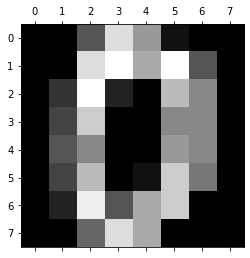

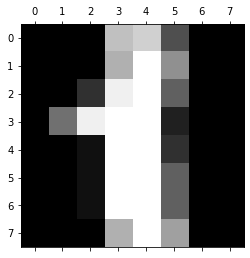

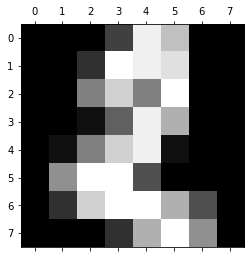

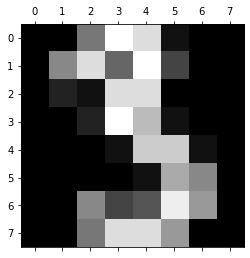

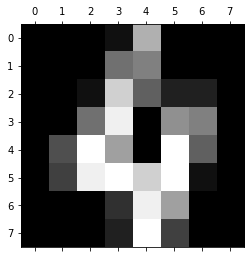

In [5]:
plt.gray()
for i in range(5): 
    plt.matshow(digits.images[i])

#### Viewing the *label* or *target*
In other cases we were trying to predict housing prices or if a person is obese or not. In that case, those were our target variables or labels. Now for each image the label will be the actual number that the image represents:

In [6]:
digits.target[:5]

array([0, 1, 2, 3, 4])

### Splitting data for training and testing

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [9]:
len(X_train), len(X_test), len(y_train), len(y_test)

(1437, 360, 1437, 360)

# Modeling

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#### Training

In [11]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### Checking score

In [12]:
model.score(X_test, y_test)

0.9611111111111111

# Lets check image recognition

Lets choose a random image and see if our model recongnizes it:

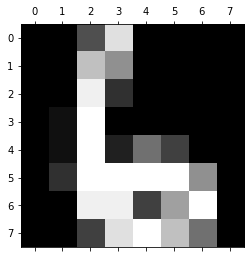

In [13]:
plt.matshow(digits.images[67])

In [14]:
print("The number in the image above is", digits.target[67])

The number in the image above is 6


##### Lets see what our model says

In [15]:
model.predict([digits.data[67]])

array([6])

NICE! Our Logistic Regression model accurately recognized this image!

But as, we as we saw, our model's score was around 95%. So we want to see where it makes errors. For that we can use a confusion matrix.

## Confusion matrix

In [16]:
y_predicted = model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 38,  0,  1,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  2],
       [ 0,  0,  1,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 31,  0,  2],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 33,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  2, 29]], dtype=int64)

Text(69.0, 0.5, 'Truth')

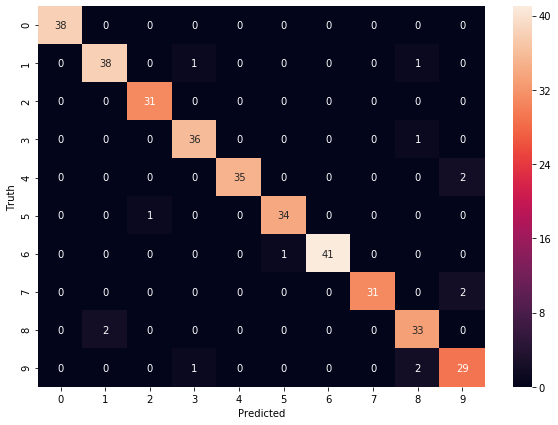

In [19]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Interpreting the confusion matrix
Here the x axis shows predicted values and the y axis shows their actual labels. We can see that the diagonal line with larger values is for the instances where the predicted values and true values were the same. So this is the number of times our model correctly predicted each number.

In the areas outside the diagonal line, is where the models predictions and true values were different. We can see that in most cases, the value is 0 in these cells. But in some cases our model made incorrect predictions.

For example, at (8, 1) we can see that 2 times our model predicted the image to be an 8 while it was actually a 1.